In [1]:
#Librerias necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

### Funciones de los distintos modelos

#### Lasso

In [2]:
# Función para graficar alphas y ver diferentes valores en base a los valores predictores
def GraphAlphasLasso(alphas, X_train, y_train):
    """
    Devuelve:
    Coeficientes según los alphas pasados
    """
    lasso = linear_model.Lasso(max_iter=10000)
    coefs = []

    for a in alphas:
        lasso.set_params(alpha=a)
        lasso.fit(X_train, y_train)
        coefs.append(lasso.coef_)
        
    return coefs

#### Ridge

In [3]:
# Función para graficar alphas y ver diferentes valores en base a los valores predictores
def GraphAlphasRidgeg(alphas, X_train, y_train):
    """
    Devuelve:
    Coeficientes según los alphas pasados
    """
    ridge = linear_model.Ridge(max_iter=10000)
    coefs = []

    for a in alphas:
        ridge.set_params(alpha=a)
        ridge.fit(X_train, y_train)
        coefs.append(ridge.coef_)

---
# Inicio
## Cargamos el dataset

In [4]:
#Cargamos el dataset limpio del TP 1
data = pd.read_csv('dataset_caba.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.rename(columns={'place_name_normalized':'place', 'property_type':'ptype'}, inplace=True)
data.sample(3)

,ptype,price,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,place,disposicion,aAstrenar,garage,balcon,piscina,sum,patio,lavadero,amenities,parrilla
3553,apartment,189000.0,60.0,55.0,3150.000000,4.0,3.0,Palermo,frente,0,0,1,0,0,1,0,0,0
2451,apartment,390000.0,373.0,373.0,1045.576408,1.0,6.0,Monserrat,frente,0,0,1,0,0,1,1,0,0
4097,apartment,210000.0,117.0,80.0,1794.871795,0.0,4.0,Villa Crespo,contrafrente,0,0,0,0,1,1,1,0,1


---
### Análisis correlación

In [5]:
#Análisis de correlación entre variables
data.corr()

,price,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,aAstrenar,garage,balcon,piscina,sum,patio,lavadero,amenities,parrilla
price,1.000000,0.834485,0.823267,0.281299,-0.000817,0.517711,-0.083331,0.218060,0.118908,0.049488,0.064869,0.081483,0.138196,0.035634,0.022389
surface_total_in_m2,0.834485,1.000000,0.954146,-0.124288,-0.026435,0.610850,-0.118977,0.096888,0.101796,-0.058191,-0.004667,0.133441,0.123006,-0.049238,-0.007513
surface_covered_in_m2,0.823267,0.954146,1.000000,-0.075633,-0.001749,0.645910,-0.126961,0.097647,0.096174,-0.076408,-0.021155,0.112948,0.135415,-0.046773,-0.048946
price_usd_per_m2,0.281299,-0.124288,-0.075633,1.000000,0.058369,-0.144575,0.104907,0.285288,0.076541,0.312766,0.186121,-0.094358,0.028815,0.242141,0.113369
floor,-0.000817,-0.026435,-0.001749,0.058369,1.000000,0.033199,0.016038,-0.013648,0.072054,0.008173,0.021748,-0.102212,0.071100,-0.016232,-0.010674
rooms,0.517711,0.610850,0.645910,-0.144575,0.033199,1.000000,-0.183809,-0.030968,0.056995,-0.168994,-0.117335,0.151473,0.148587,-0.136284,-0.162959
aAstrenar,-0.083331,-0.118977,-0.126961,0.104907,0.016038,-0.183809,1.000000,0.116874,0.096160,0.089032,0.122084,-0.057620,-0.079346,0.088567,0.143504
garage,0.218060,0.096888,0.097647,0.285288,-0.013648,-0.030968,0.116874,1.000000,0.171313,0.339806,0.324783,-0.055086,0.092609,0.307336,0.256206
balcon,0.118908,0.101796,0.096174,0.076541,0.072054,0.056995,0.096160,0.171313,1.000000,0.107332,0.094853,-0.087225,0.131198,0.110654,0.155494
piscina,0.049488,-0.058191,-0.076408,0.312766,0.008173,-0.168994,0.089032,0.339806,0.107332,1.000000,0.508099,-0.028379,0.122261,0.477500,0.386301


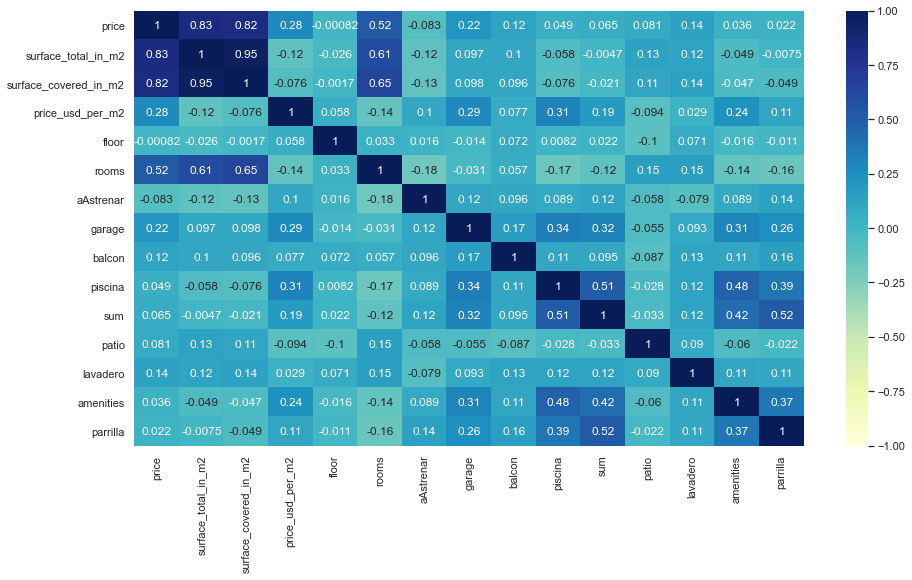

In [6]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu",annot=True);

---
# Modelo 1
Este modelo solo utiliza las columnas básicas del dataset: floor y rooms

In [7]:
name_model="Modelo 1" #Cambiar este nombre para cambiar los resultados de los estadísticos de cada algoritmo

## Pre-Training
### Manejo variables categóricas

In [8]:
#Creo dummies para el piso
data_dummies=pd.get_dummies(data['floor'], prefix='floor', drop_first = True)
data_dummies

,floor_1.0,floor_2.0,floor_3.0,floor_4.0,floor_5.0,floor_6.0,floor_7.0,floor_8.0,floor_9.0,floor_10.0,...,floor_14.0,floor_15.0,floor_16.0,floor_17.0,floor_18.0,floor_20.0,floor_21.0,floor_22.0,floor_23.0,floor_24.0
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6398,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6399,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6400,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Concateno
columnas=['price_usd_per_m2','rooms']
data_modelo1 = pd.concat([data[columnas],data_dummies], axis = 1)
data_modelo1 = data_modelo1.reset_index(drop=True)
data_modelo1.head(3)

,price_usd_per_m2,rooms,floor_1.0,floor_2.0,floor_3.0,floor_4.0,floor_5.0,floor_6.0,floor_7.0,floor_8.0,...,floor_14.0,floor_15.0,floor_16.0,floor_17.0,floor_18.0,floor_20.0,floor_21.0,floor_22.0,floor_23.0,floor_24.0
0,1309.090909,2.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1812.500000,4.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1702.127660,5.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Genero mi variable X
X=data_modelo1.drop(['price_usd_per_m2'],axis=1)

## Algoritmos

In [11]:
#Genero la variable y
y = data_modelo1['price_usd_per_m2']

#Creamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100,shuffle=True)

### Linear Regression

In [12]:
#Entrenamos modelo LR
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
#Predecimos
lr_prediction = model_lr.predict(X_test)
lr_prediction_train = model_lr.predict(X_train)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 train, R2 test
stats_lr=[mean_squared_error(y_test, lr_prediction),mean_squared_error(y_train, lr_prediction_train),
       mean_absolute_error(y_test, lr_prediction), mean_absolute_error(y_train, lr_prediction_train), 
       np.sqrt(mean_squared_error(y_test, lr_prediction)),np.sqrt(mean_squared_error(y_train, lr_prediction_train)),
        model_lr.score(X_train, y_train),model_lr.score(X_test, y_test)]

stats_dataframe_lr=pd.DataFrame({name_model+' LR':stats_lr},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 train',' R2 test'])
stats_dataframe_lr

,Modelo 1 LR
MSE Test,372837.003581
MSE Train,374402.728164
MAE Test,486.109860
MAE Train,486.152111
RMSE Test,610.603802
RMSE Train,611.884571
R2 train,0.035855
R2 test,0.025243


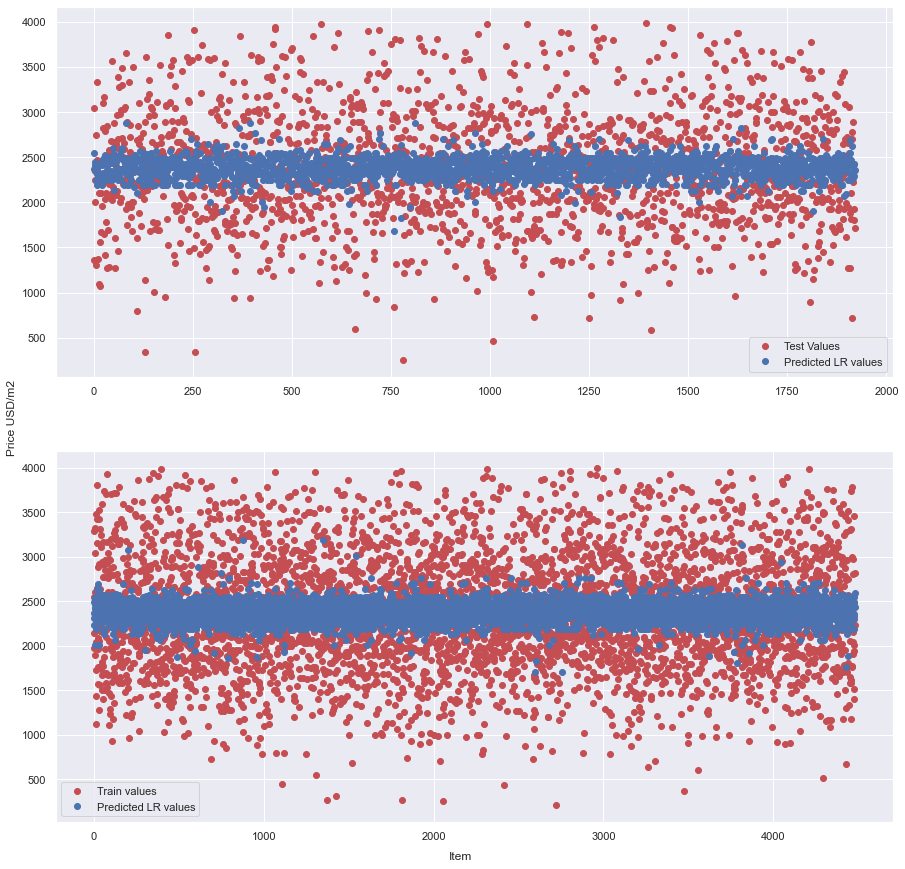

In [13]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lr_prediction, 'bo', label="Predicted LR values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lr_prediction_train, 'bo', label="Predicted LR values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

### OLS

In [14]:
#Entrenamos modelo OLS
X_train_sm = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_sm).fit()
#Predecimos
X_train_sm = sm.add_constant(X_train)
sm_prediction_train = model_ols.predict(X_train_sm)
X_test_sm = sm.add_constant(X_test)
sm_prediction = model_ols.predict(X_test_sm)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2, R2 adj Train
stats_ols=[mean_squared_error(y_test, sm_prediction),mean_squared_error(y_train, sm_prediction_train),
        mean_absolute_error(y_test, sm_prediction), mean_absolute_error(y_train, sm_prediction_train), 
        np.sqrt(mean_squared_error(y_test, sm_prediction)),np.sqrt(mean_squared_error(y_train, sm_prediction_train)),
          model_ols.rsquared, model_ols.rsquared_adj]

stats_dataframe_ols=pd.DataFrame({name_model+' OLS':stats_ols},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2', 'R2 ADJ'])

#Summary
print(model_ols.summary())
print("")
print(stats_dataframe_ols)

                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     7.207
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           4.28e-23
Time:                        03:08:14   Log-Likelihood:                -35111.
No. Observations:                4481   AIC:                         7.027e+04
Df Residuals:                    4457   BIC:                         7.042e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2550.8793     23.286    109.547      0.0

C:\Users\nacho\miniconda3\envs\dsdh22\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


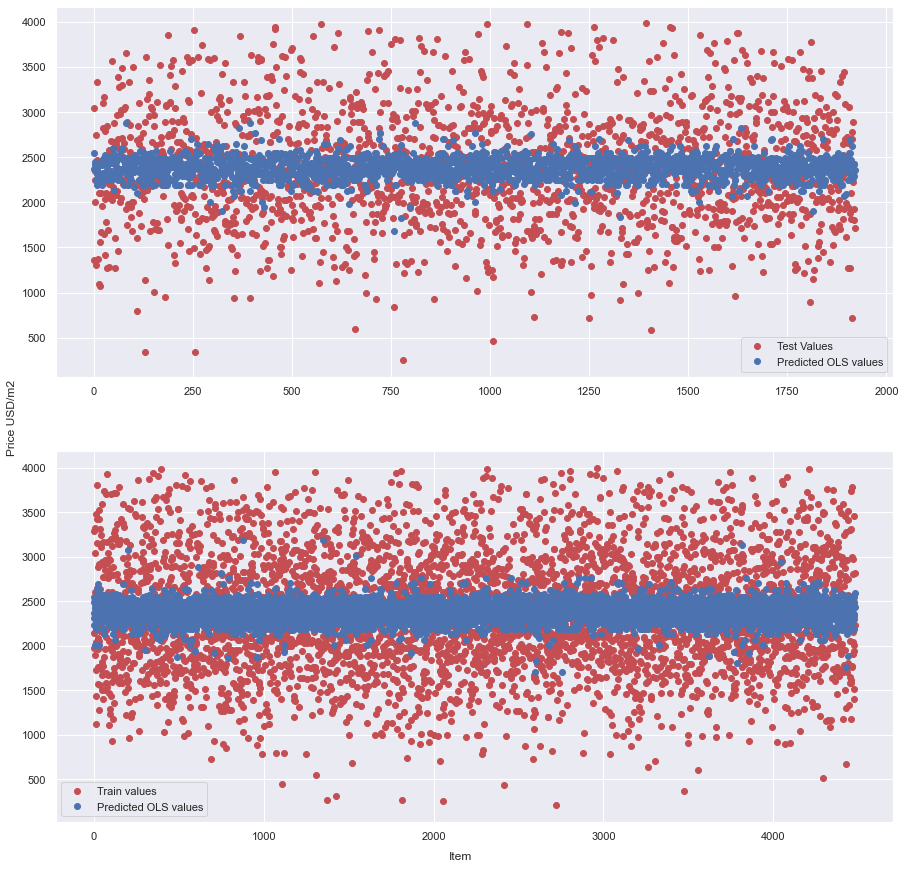

In [15]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted OLS values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],sm_prediction_train, 'bo', label="Predicted OLS values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

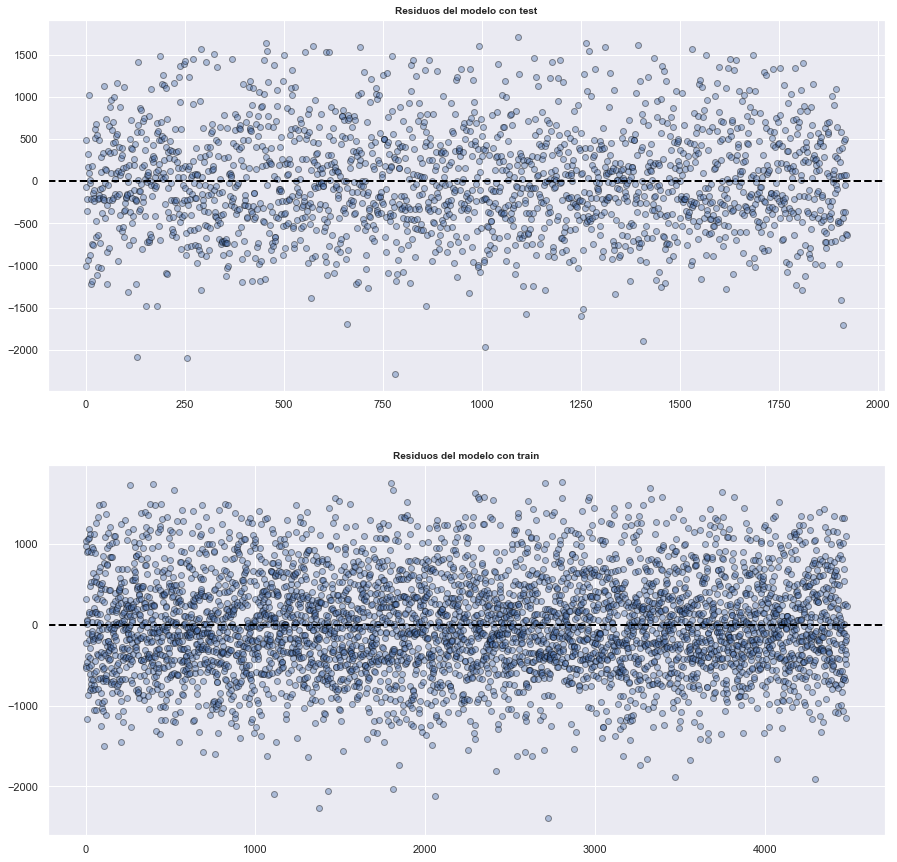

In [16]:
#Gráfico de los residuos
model_residuals_test = y_test - sm_prediction
model_residuals_train = y_train - sm_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

<AxesSubplot:ylabel='Density'>

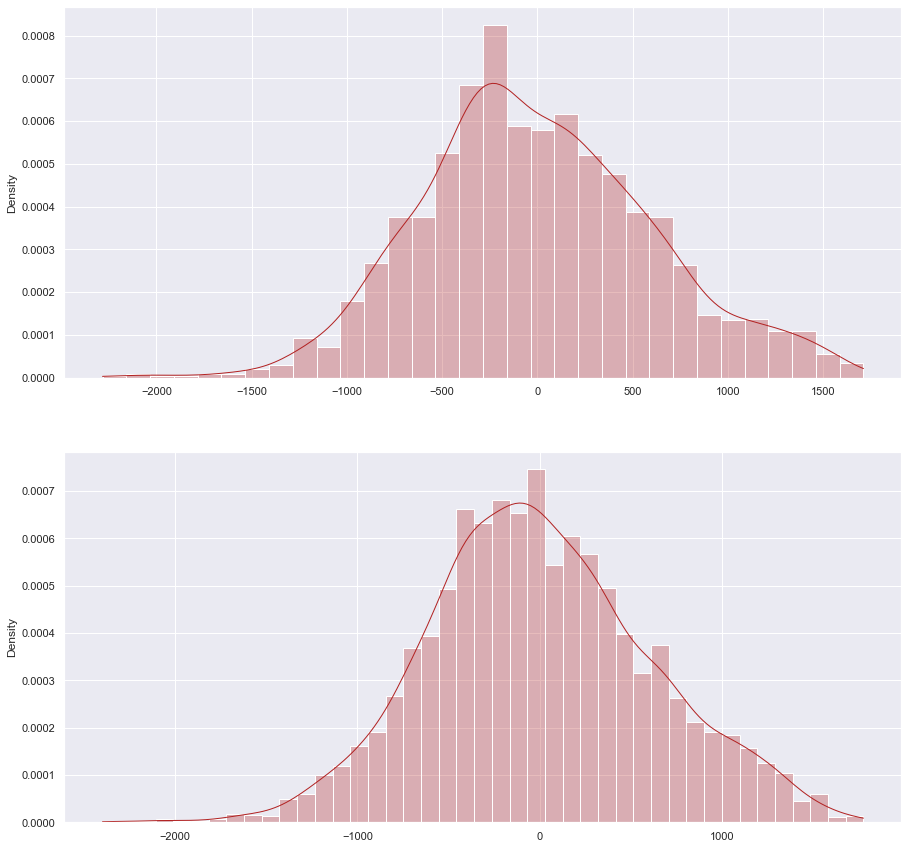

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

sns.histplot(
    data    = model_residuals_test,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

sns.histplot(
    data    = model_residuals_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1]
)

### LASSO

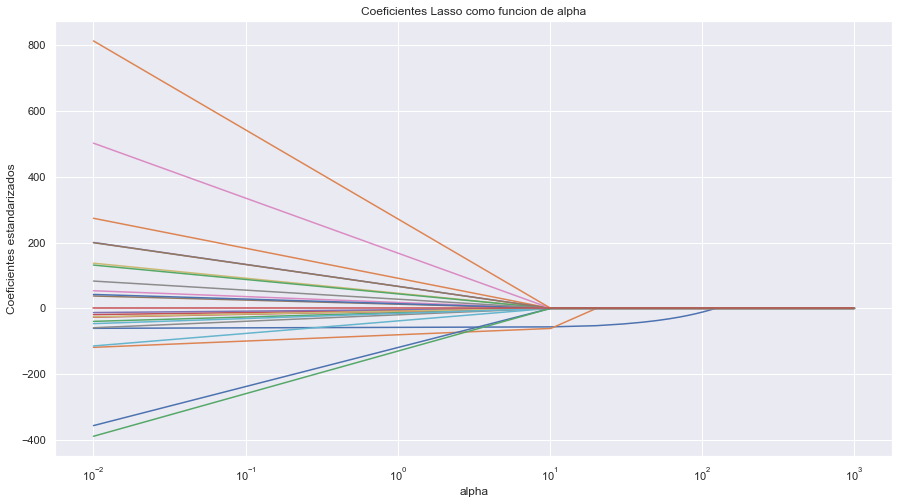

In [18]:
#Análisis previo de los alpha
alphas_lasso = np.linspace(0.01,1000,100)
coefs = GraphAlphasLasso(alphas_lasso,X_train,y_train)
ax = plt.gca()

ax.plot(alphas_lasso, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Lasso como funcion de alpha');

In [19]:
#Creamos el modelo
lassocv = linear_model.LassoCV(alphas=None,normalize=False,cv=10,random_state=10, max_iter=10000)
#Lo entrenamos
model_lcv = lassocv.fit(X_train, y_train)
#Lo probamos
lasso_prediction = model_lcv.predict(X_test)
lasso_prediction_train = model_lcv.predict(X_train)

alpha_lasso = model_lcv.alpha_
coeff_lasso = model_lcv.coef_

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 train, R2 test
stats_lasso=[mean_squared_error(y_test, lasso_prediction),mean_squared_error(y_train, lasso_prediction_train),
       mean_absolute_error(y_test, lasso_prediction), mean_absolute_error(y_train, lasso_prediction_train), 
       np.sqrt(mean_squared_error(y_test, lasso_prediction)),np.sqrt(mean_squared_error(y_train, lasso_prediction_train)),
        model_lr.score(X_train, y_train),model_lr.score(X_test, y_test)]

stats_dataframe_lasso=pd.DataFrame({name_model+' Lasso':stats_lasso},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 train',' R2 test'])
stats_dataframe_lasso

,Modelo 1 Lasso
MSE Test,372795.330002
MSE Train,375907.608242
MAE Test,486.558865
MAE Train,487.566013
RMSE Test,610.569677
RMSE Train,613.113047
R2 train,0.035855
R2 test,0.025243


In [20]:
print("Alpha Lasso:",alpha_lasso)
print("Coeficientes Ridge:")
print(pd.Series(coeff_lasso, index=X.columns))

Alpha Lasso: 0.9265265574309173
Coeficientes Ridge:
rooms         -59.627615
floor_1.0    -120.636700
floor_2.0     -38.403653
floor_3.0     -15.673081
floor_4.0      -7.414643
floor_5.0      14.637316
floor_6.0      32.368581
floor_7.0     -39.669872
floor_8.0     105.561345
floor_9.0     -89.986707
floor_10.0      0.000000
floor_11.0    177.969891
floor_12.0      0.000000
floor_13.0     -0.000000
floor_14.0      0.000000
floor_15.0      0.000000
floor_16.0      0.000000
floor_17.0      0.000000
floor_18.0     -0.000000
floor_20.0     -0.000000
floor_21.0     -0.000000
floor_22.0      0.000000
floor_23.0     -0.000000
floor_24.0      0.000000
dtype: float64


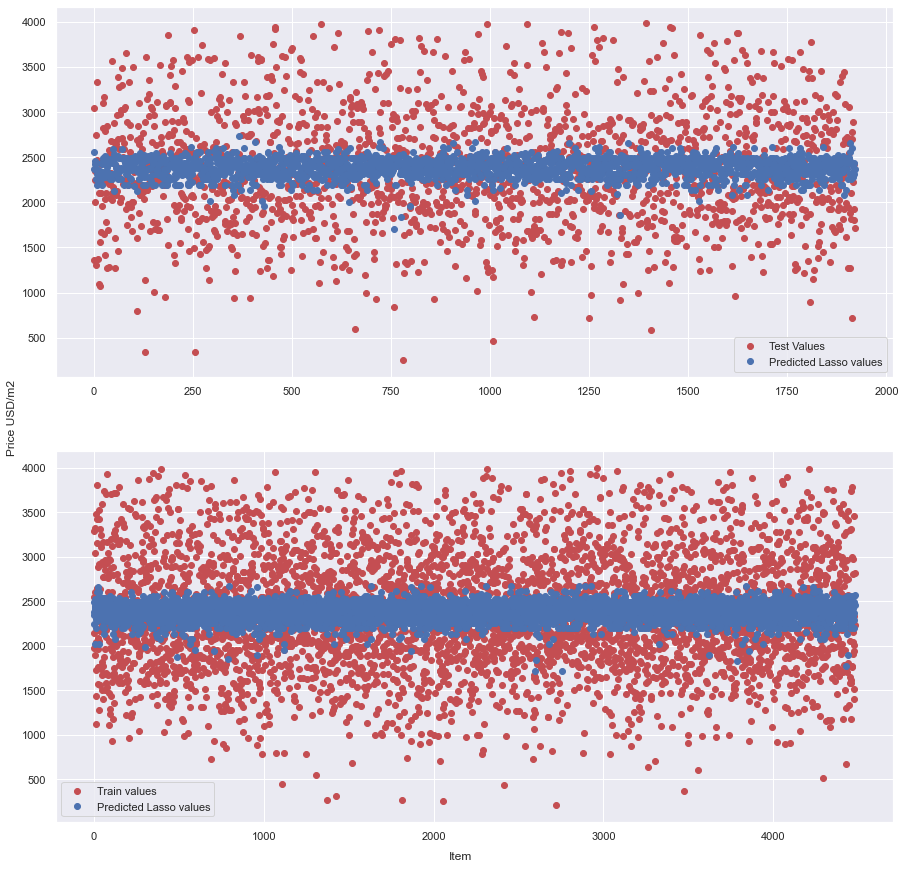

In [21]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lasso_prediction, 'bo', label="Predicted Lasso values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lasso_prediction_train, 'bo', label="Predicted Lasso values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

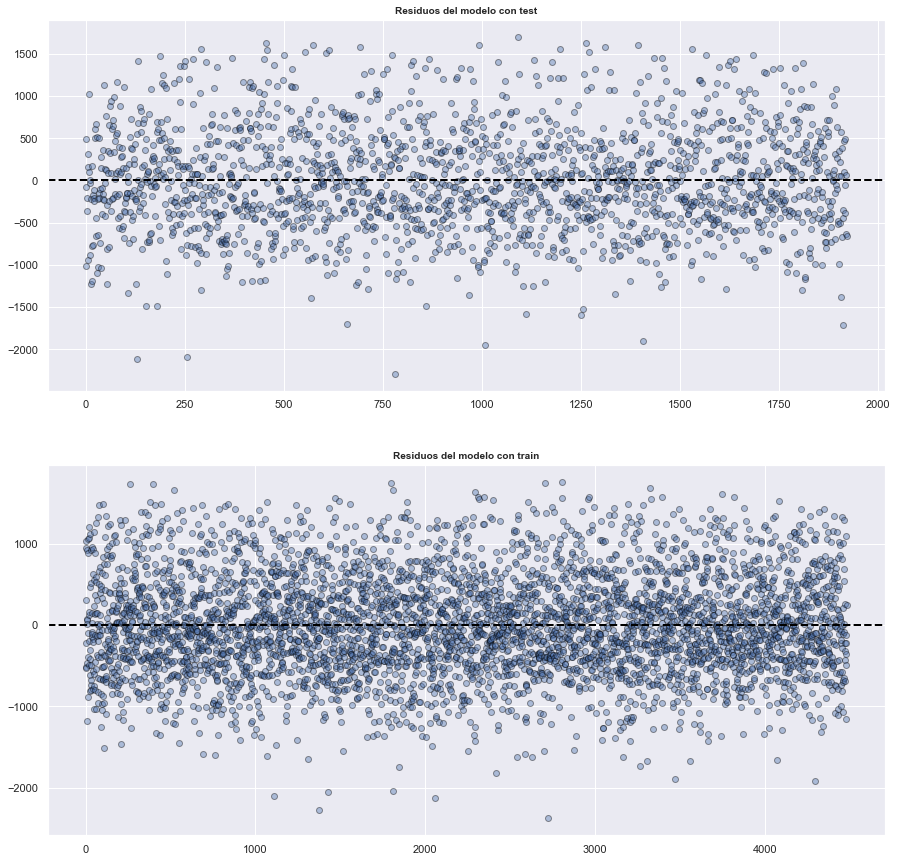

In [22]:
#Gráfico de los residuos
model_residuals_test = y_test - lasso_prediction
model_residuals_train = y_train-lasso_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

<AxesSubplot:xlabel='price_usd_per_m2', ylabel='Density'>

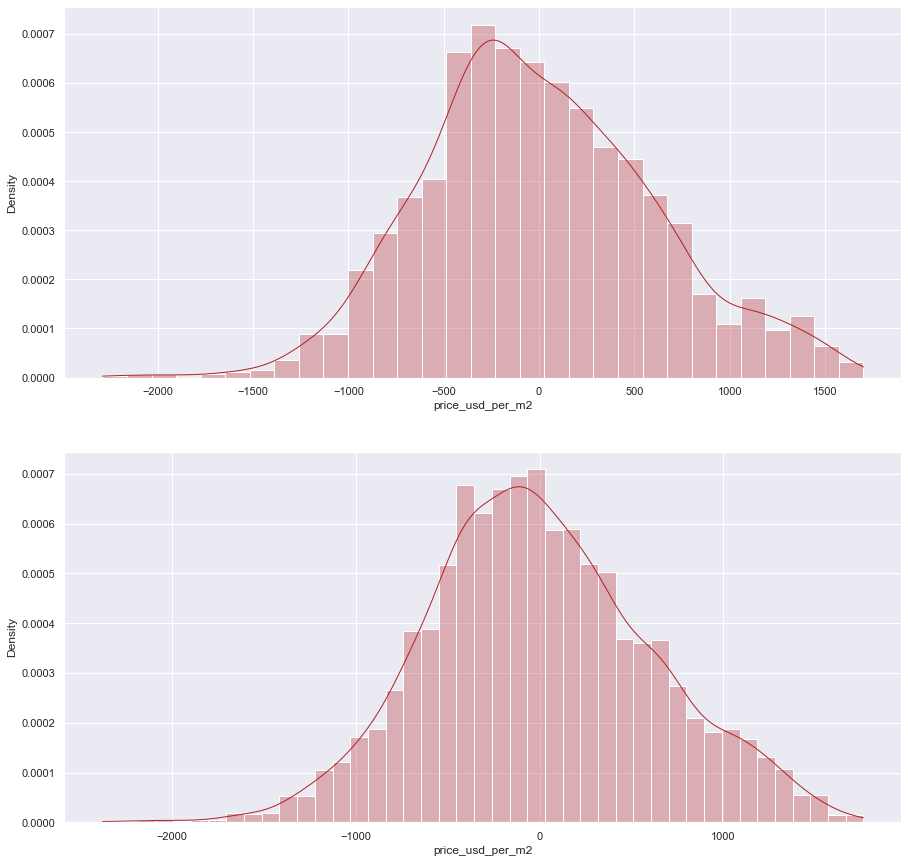

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

sns.histplot(
    data    = model_residuals_test,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

sns.histplot(
    data    = model_residuals_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1]
)

## Ridge

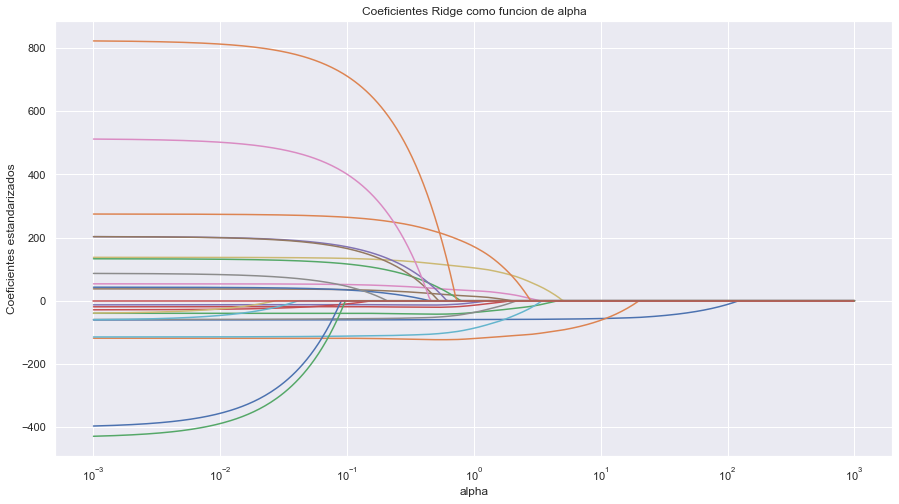

In [24]:
#Análisis previo de los alpha
#alphas_ridge = np.logspace(-10, 10, 400)
alphas_ridge = np.logspace(-3, 3,400)
coefs = GraphAlphasLasso(alphas_ridge,X_train,y_train)

ax = plt.gca()

ax.plot(alphas_ridge, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Ridge como funcion de alpha');

In [25]:
#Creamos el modelo
ridgecv = linear_model.RidgeCV(alphas=alphas_ridge,normalize=False,cv=10)
#Lo entrenamos
model_ridge = ridgecv.fit(X_train, y_train)
#Lo probamos
ridge_prediction = model_ridge.predict(X_test)
ridge_prediction_train = model_ridge.predict(X_train)

alpha_ridge = model_ridge.alpha_
coeff_ridge = model_ridge.coef_

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 train, R2 test
stats_ridge=[mean_squared_error(y_test, ridge_prediction),mean_squared_error(y_train, ridge_prediction_train),
       mean_absolute_error(y_test, ridge_prediction), mean_absolute_error(y_train, ridge_prediction_train), 
       np.sqrt(mean_squared_error(y_test, ridge_prediction)),np.sqrt(mean_squared_error(y_train, ridge_prediction_train)),
        model_lr.score(X_train, y_train),model_lr.score(X_test, y_test)]

stats_dataframe_ridge=pd.DataFrame({name_model+' Ridge':stats_ridge},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 train',' R2 test'])
stats_dataframe_ridge

,Modelo 1 Ridge
MSE Test,372361.758384
MSE Train,375592.049855
MAE Test,486.254855
MAE Train,487.267503
RMSE Test,610.214518
RMSE Train,612.855652
R2 train,0.035855
R2 test,0.025243


In [26]:
print("Alpha Ridge:",alpha_ridge)
print("Coeficientes Ridge:")
print(pd.Series(coeff_ridge, index=X.columns))

Alpha Ridge: 41.35626917817706
Coeficientes Ridge:
rooms         -59.659997
floor_1.0    -121.423173
floor_2.0     -44.475180
floor_3.0     -24.971407
floor_4.0     -19.093244
floor_5.0      25.333293
floor_6.0      39.716931
floor_7.0     -53.492436
floor_8.0     103.098079
floor_9.0     -93.789042
floor_10.0     19.860099
floor_11.0    140.310894
floor_12.0     50.425000
floor_13.0    -13.255915
floor_14.0     49.289307
floor_15.0     43.806170
floor_16.0     44.539213
floor_17.0     16.603854
floor_18.0     -3.335347
floor_20.0     -4.771229
floor_21.0     -9.678384
floor_22.0     71.822721
floor_23.0    -10.444044
floor_24.0      0.000000
dtype: float64


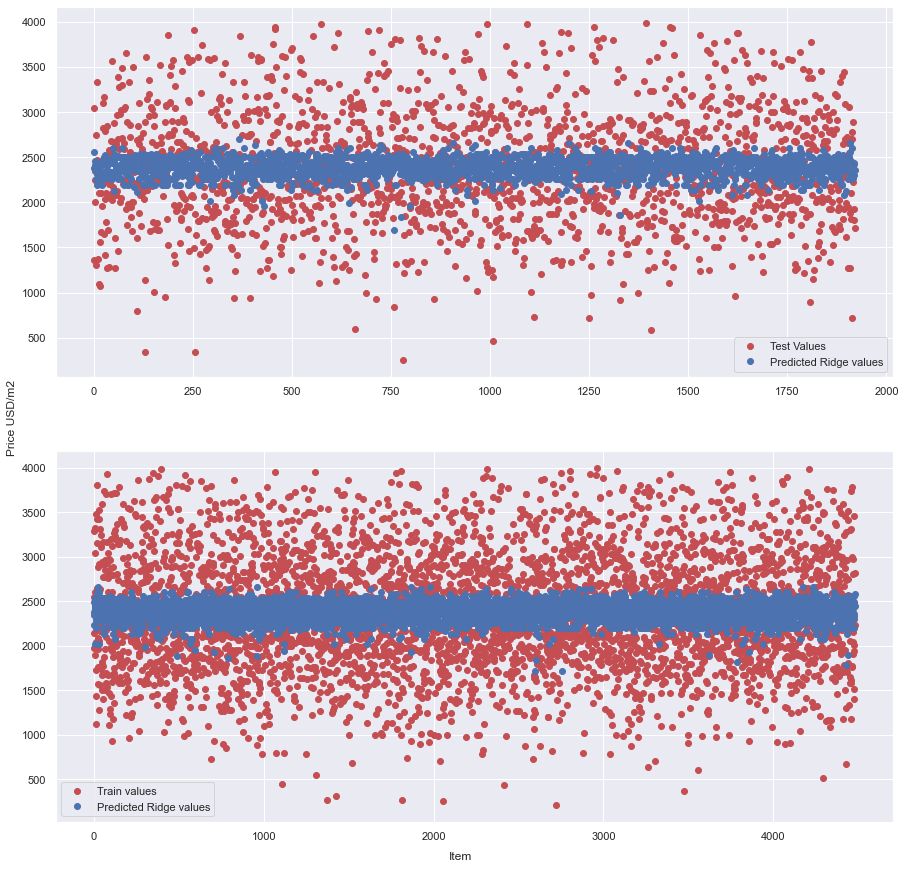

In [27]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],ridge_prediction, 'bo', label="Predicted Ridge values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],ridge_prediction_train, 'bo', label="Predicted Ridge values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

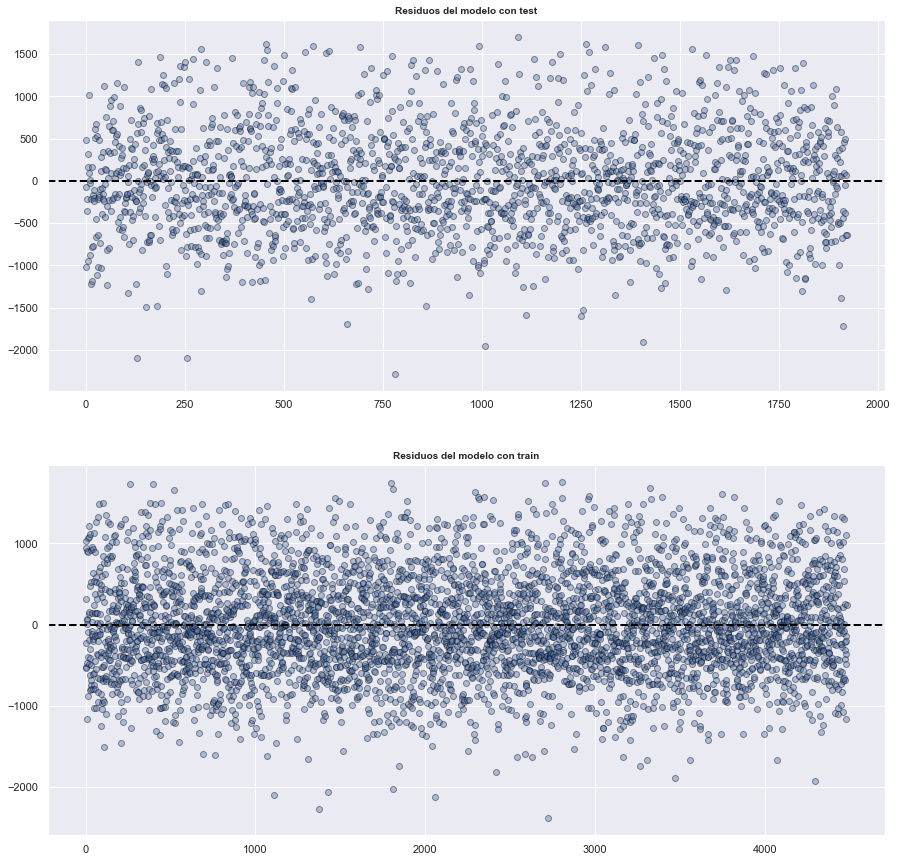

In [28]:
#Gráfico de los residuos
model_residuals_test = y_test - ridge_prediction
model_residuals_train = y_train-ridge_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

<AxesSubplot:xlabel='price_usd_per_m2', ylabel='Density'>

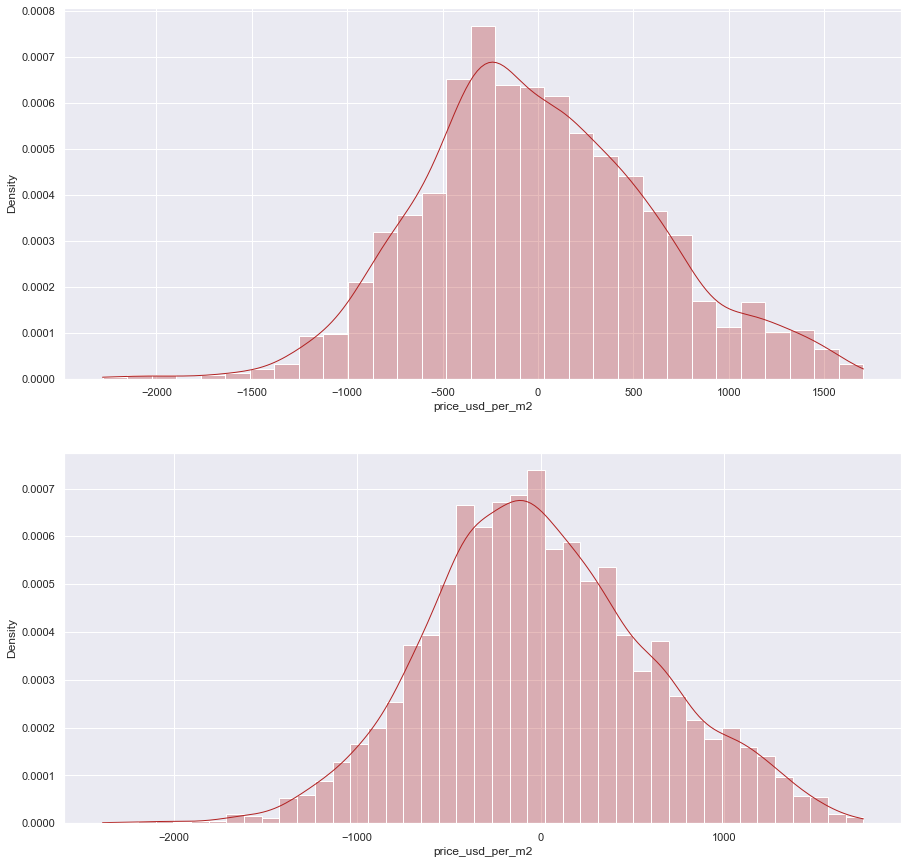

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

sns.histplot(
    data    = model_residuals_test,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

sns.histplot(
    data    = model_residuals_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1]
)

----
## Modelos comparados entre sí

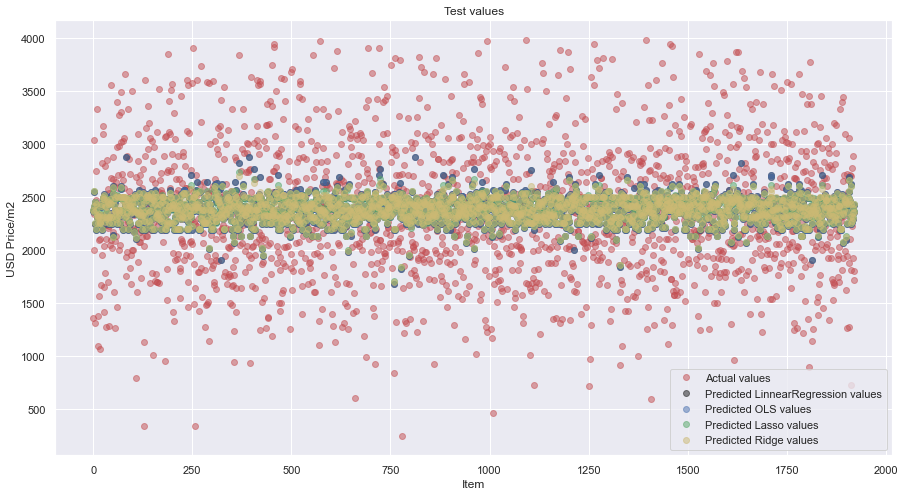

In [30]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_test))],y_test, 'ro',label="Actual values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],lr_prediction, 'ko',label="Predicted LinnearRegression values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],lasso_prediction, 'go', label="Predicted Lasso values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],ridge_prediction, 'yo', label="Predicted Ridge values",alpha=0.5)

# showing the plotting of lasso regression
plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.title("Test values")
plt.show()

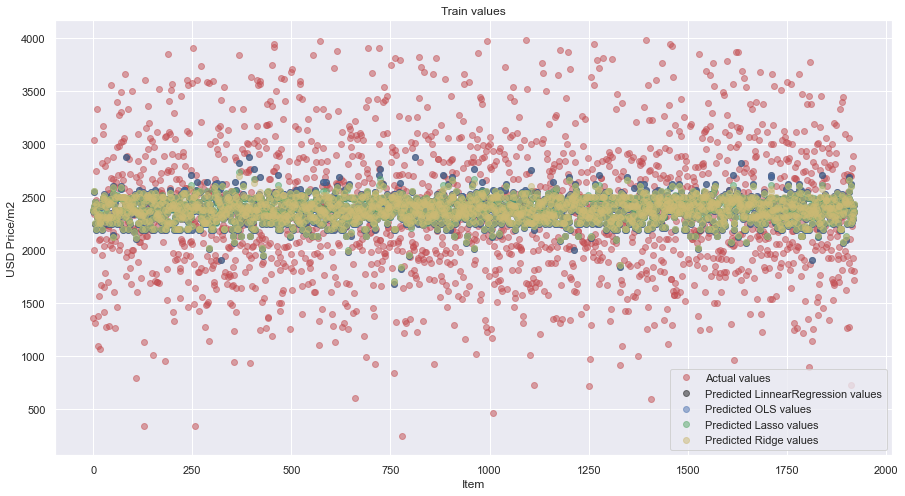

In [31]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_test))],y_test, 'ro',label="Actual values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],lr_prediction, 'ko',label="Predicted LinnearRegression values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],lasso_prediction, 'go', label="Predicted Lasso values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],ridge_prediction, 'yo', label="Predicted Ridge values",alpha=0.5)

# showing the plotting of lasso regression
plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.title("Train values")
plt.show()

In [34]:
pd.concat([stats_dataframe_lr,stats_dataframe_lasso,stats_dataframe_ridge],axis=1)

,Modelo 1 LR,Modelo 1 Lasso,Modelo 1 Ridge
MSE Test,372837.003581,372795.330002,372361.758384
MSE Train,374402.728164,375907.608242,375592.049855
MAE Test,486.109860,486.558865,486.254855
MAE Train,486.152111,487.566013,487.267503
RMSE Test,610.603802,610.569677,610.214518
RMSE Train,611.884571,613.113047,612.855652
R2 train,0.035855,0.035855,0.035855
R2 test,0.025243,0.025243,0.025243
